# Logistic Regression Model on Heart Disease prediction

The purpose of this notebook is to build a model that will predict the likelihood of a patient having Heart disease

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.shape

(297, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


From the max of cholesterol, we can see that their are outliers in our data

In [7]:
# Checking for the outliers in the chol column
chol_outliers = df[df['chol']>360]
chol_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
79,67,0,2,115,564,0,2,160,0,1.6,1,0,2,0
83,65,0,2,140,417,1,2,157,0,0.8,0,1,0,0
180,63,0,3,150,407,0,2,154,0,4.0,1,3,2,1
188,62,0,3,140,394,0,2,157,0,1.2,1,0,0,0
238,56,0,3,134,409,0,2,150,1,1.9,1,2,2,1


In [8]:
chols = [79, 83, 180, 188, 238]

In [9]:
# deleting the outliers from the dataframe
df.drop(chols, inplace=True)

In [10]:
df.shape

(292, 14)

### Prepping categorical variables for visualizations

We will make a copy of our dataframe, and replace the categorical variables from numbers to there original names from the data documentation

In [11]:
dfa = df.copy()

In [12]:
dfa['sex'] = dfa['sex'].map({0: 'Female', 1: 'Male'})

cp_mapping = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
dfa['cp'] = dfa['cp'].map(cp_mapping)

fbs_mapping = {0: 'Blood Sugar > 120 On Fasting', 1: 'Blood Sugar < 120 On Fasting'}
dfa['fbs'] = dfa['fbs'].map(fbs_mapping)

restecg_mapping = {0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Probable or definite left ventricular hypertrophy'}
dfa['restecg'] = dfa['restecg'].map(restecg_mapping)

exang_mapping = {0: 'Angina Not Induced by Excercise', 1: 'Angina Induced by Excercise'}
dfa['exang'] = dfa['exang'].map(exang_mapping)

slope_mapping = {0: 'Up Sloping', 1: 'Flat', 2: 'Down Sloping'}
dfa['slope'] = dfa['slope'].map(slope_mapping)

thal_mapping = {0: 'Normal Blood Flow', 1: 'Fixed Defect', 2: 'Reversable Defect'}
dfa['thal'] = dfa['thal'].map(thal_mapping)

condition_mapping = {0: 'Heart Disease Negative', 1:'Heart Disease Positive'}
dfa['condition'] = dfa['condition'].map(condition_mapping)

Text(0.5, 1.0, 'Sex vs Cp')

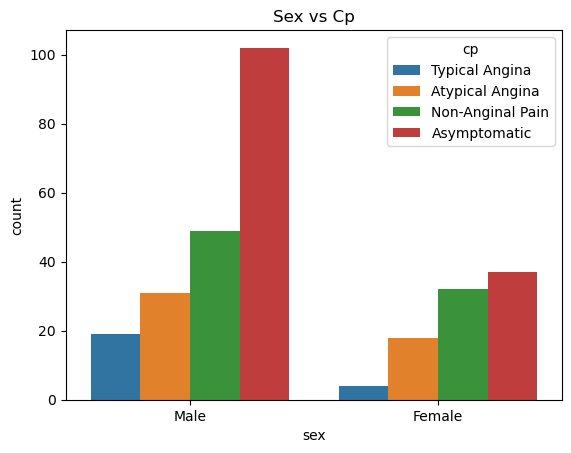

In [13]:
# Sex vs cp
sns.countplot(data= dfa, x='sex',hue='cp')
plt.title('Sex vs Cp')

Males generally have more Chest pain cases than females with Asymptomatic having the highest in both

Text(0.5, 1.0, 'Sex vs Target')

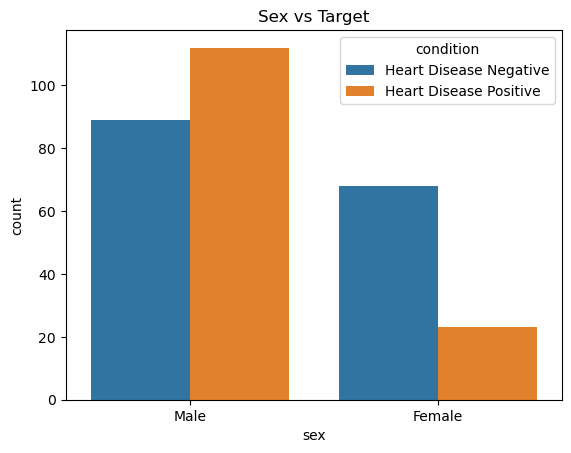

In [14]:
# Sex vs condition
sns.countplot(data= dfa, x='sex',hue='condition')
plt.title('Sex vs Target')

While the data is highly skewed towards men, more man have heart disease than those without than there female counterparts

Text(0.5, 1.0, 'Sex vs Ca')

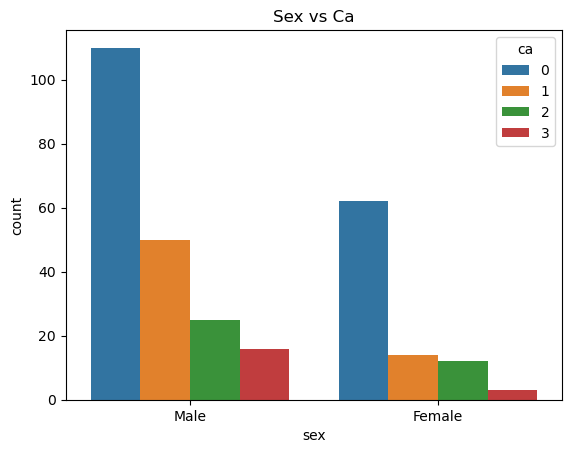

In [15]:
# sex vs ca
sns.countplot(data= dfa, x='sex',hue='ca')
plt.title('Sex vs Ca')

Both genders have majority of there blood vessels not colored by flourosopy

###  Feature Engineering of Attributes to Select Correlation Values

<AxesSubplot:>

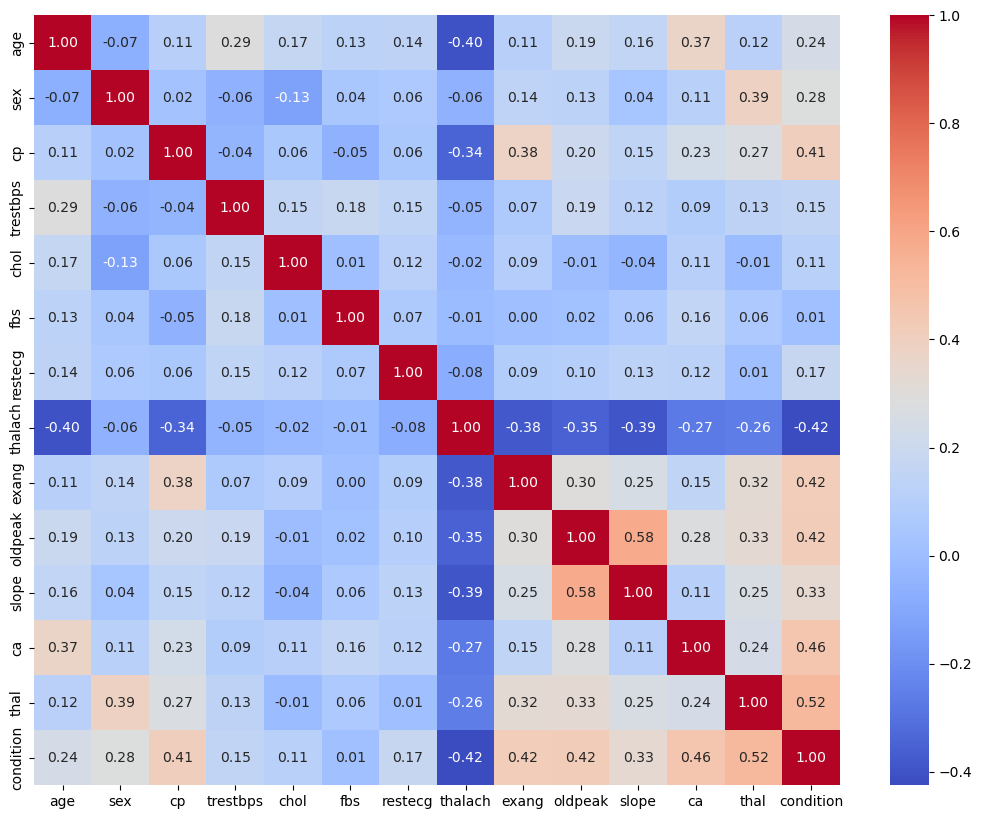

In [16]:
# Using heatmap to check for correlation
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.2f')

From the above heatmap we can clearly see that thal, ca, oldpeak, exang and cp have a high positive correlation while thalach has a negative one, we are going to include age as we think it also is important for our model

### Machine Learning

In [17]:
# Select the columns with high correlations
X = df[['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]

In [18]:
y = df['condition']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 734)

In [20]:
# Checking for separation in the datasets
print("Y_train: ", sum(y_train == 0))
print("Y_train: ", sum(y_train == 1))
print("Y_test: ", sum(y_test == 0))
print("Y_test: ", sum(y_test == 1))

Y_train:  111
Y_train:  93
Y_test:  46
Y_test:  42


We generally have a balanced spread of the data

In [21]:
model = LogisticRegression(max_iter=2000)

In [22]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [23]:
# Checking the various metrics for the model
acc = model.score(X_train, y_train)

predictions = model.predict(X_train)
tp = sum((predictions == 1) & (y_train == 1))
fp = sum((predictions == 1) & (y_train == 0))
tn = sum((predictions == 0) & (y_train == 0))
fn = sum((predictions == 0) & (y_train == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Training Accuracy: ", acc)
print("Training Sensitivity: ", sens)
print("Training Specificity: ", spec)

Training Accuracy:  0.8284313725490197
Training Sensitivity:  0.7956989247311828
Training Specificity:  0.8558558558558559


Overall the training accuracy was about 82%, the sensitivity was 79%, and the specificity was 85%. Based on these metrics, the model seems to perform better for non-cases.

## Interpreting The Model Coefficients

In [24]:
coefs = ['age', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

# Checking in terms of log-odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(val, 2))

age : 0.01
cp : 0.48
thalach : -0.02
exang : 0.69
oldpeak : 0.48
ca : 1.03
thal : 0.9


In [25]:
# Checking in terms of odds
for coef, val  in zip(coefs, model.coef_[0]):
    print(coef, ":", round(np.exp(val), 2))

age : 1.01
cp : 1.62
thalach : 0.98
exang : 2.0
oldpeak : 1.61
ca : 2.81
thal : 2.46


## Final Model Evaluation

In [26]:
# Checking the various metrics for the model (test set)
acc = model.score(X_test, y_test)

predictions = model.predict(X_test)
tp = sum((predictions == 1) & (y_test == 1))
fp = sum((predictions == 1) & (y_test == 0))
tn = sum((predictions == 0) & (y_test == 0))
fn = sum((predictions == 0) & (y_test == 1))
sens = tp / (tp + fn)
spec = tn / (tn + fp)

print("Test Accuracy: ", acc)
print("Test Sensitivity: ", sens)
print("Test Specificity: ", spec)

Test Accuracy:  0.8636363636363636
Test Sensitivity:  0.8095238095238095
Test Specificity:  0.9130434782608695


## Drawing Conclusions

Test accuracy was 86%, sensitivity was 80%, and specificity was 91%. Compared to the training set, the accuracy improved, while the model fared better with non-cases and worse with cases. This is potentially useful since this application is health-based. They both have a high accuracy meaning that the model will do well.